In [10]:
!pip install requests pandas seaborn

In [11]:

import requests
import pandas as pd

# Download the API data and convert to a pandas DataFrame
dpgs_json_dict = requests.get("https://api.digitalpublicgoods.net/dpgs").json()
df = pd.DataFrame.from_dict(dpgs_json_dict)

# See what we got
df.head()

,id,name,sectors,stage,privacy,organizations,platformIndependence,aliases,categories,description,...,NonPII,openStandards,dataPrivacySecurity,userContent,protectionFromHarassment,bestPractices,deploymentCountriesDepartments,deploymentOrganisations,otherDeploymentOrganisations,awardsReceived
0,10019,Care,[],DPG,[{'privacyCompliance': 'India's Personal Data ...,"[{'name': 'Care', 'website': 'https://ohc.netw...","{'isPlatformIndependent': 'No', 'openAlternati...",[Coronasafe Care],[Open Software],Care is a tool enabling TeleICU & Decentralise...,...,"{'collectsNonPII': 'Yes', 'nonPIIAccessMechani...","[- OpenWeb Standard - HTML, CSS, ECMAScript,...",{'collectsPII': 'PII data is collected and sto...,{'contentManagement': 'Content is NOT collecte...,"{'facilitatesUserInteraction': 'No', 'harassme...","[Principles For Digital Development:, - Design...","[Government of Manipur, India\r\nGovernment o...",,,
1,10024,DIGIT,[],DPG,[{'privacyCompliance': 'Information Technology...,"[{'name': 'DIGIT', 'website': 'https://www.dig...","{'isPlatformIndependent': 'No', 'openAlternati...","[Digital Infrastructure for Governance, Impac...","[Open Software, ]","DIGIT is an open-source, configurable, extenda...",...,"{'collectsNonPII': 'Yes', 'nonPIIAccessMechani...","[OpenAPI Specifications Transfer Protocol, HTT...",{'collectsPII': 'PII data is collected and sto...,{'contentManagement': 'Content is NOT collecte...,"{'facilitatesUserInteraction': 'No', 'harassme...","[1. Ecosystem-Driven, 2. Interoperability thro...",,,,
2,10025,DIVOC,[],DPG,[{'privacyCompliance': 'GDPR & HIPAA for perso...,"[{'name': 'DIVOC', 'website': 'https://divoc.e...","{'isPlatformIndependent': 'No', 'openAlternati...",[Digital Infrastructure for Vaccination Open C...,[Open Software],Open source digital platform for large scale d...,...,"{'collectsNonPII': 'Yes', 'nonPIIAccessMechani...","[GS1, GTIN, EPCIS, ISO/IEC 12207 System archit...",{'collectsPII': 'PII data is NOT collected NOT...,{'contentManagement': 'Content is NOT collecte...,"{'facilitatesUserInteraction': 'No', 'harassme...",[The link https://divoc.egov.org.in/tech-docs ...,,,,
3,10044,Hand-in-Hand Geospatial Platform,[],DPG,[{'privacyCompliance': 'PRIVACY POLICY FOR USE...,"[{'name': 'Hand-in-Hand Geospatial Platform', ...","{'isPlatformIndependent': 'No', 'openAlternati...",,[Open Data],The Hand-in-Hand Geospatial Platform is a supp...,...,"{'collectsNonPII': 'Yes', 'nonPIIAccessMechani...","[HTTPS, HTML, CSS]",{'collectsPII': 'PII data is NOT collected NOT...,{'contentManagement': 'Content is NOT collecte...,"{'facilitatesUserInteraction': 'No', 'harassme...","[Principles For Digital Development, \r\nHuman...",,,,
4,10051,iVerify,[],DPG,[{'privacyCompliance': 'Zambia: THE DATA PROTE...,"[{'name': 'iVerify', 'website': 'https://digit...","{'isPlatformIndependent': 'Yes', 'openAlternat...",[],[Open Software],AI-powered information platform to combat misi...,...,"{'collectsNonPII': 'Yes', 'nonPIIAccessMechani...",[1) Accessibility - WCAG 2.0/2.1 (Web Content ...,{'collectsPII': 'PII data is collected and sto...,{'contentManagement': 'Content is collected an...,"{'facilitatesUserInteraction': 'No', 'harassme...","[Principles of Digital Development, \r\n\r\nS...",,[United Nations Development Programme],,


In [12]:
# Extract deploymentCountries and developmentCountries from the locations column.
df_loc = pd.merge(df, pd.json_normalize(df["locations"]), left_index=True, right_index=True)

# Now we have two new columns in the dataframe. 
# Let's see the contents
df_loc[["deploymentCountries", "developmentCountries"]]

,deploymentCountries,developmentCountries
0,[India],[India]
1,[India],[India]
2,"[India, Sri Lanka]",[India]
3,"[Afghanistan, Angola, Bangladesh, Bhutan, Burk...","[Afghanistan, Angola, Bangladesh, Bhutan, Burk..."
4,"[Honduras, Zambia]","[Belgium, Honduras, Italy, Spain, United State..."
...,...,...
137,"[Algeria, Angola, Argentina, Australia, Austri...","[Australia, Austria, Bangladesh, Belgium, Braz..."
138,"[India, Indonesia, Kenya, Liberia, Malawi, Nig...","[India, Indonesia, Kenya, Pakistan, United Kin..."
139,"[Brazil, Ethiopia, Guinea-Bissau, Mozambique, ...","[Ethiopia, France, Rwanda, South Africa, Ugand..."
140,"[Albania, Argentina, Armenia, Australia, Bangl...","[Australia, Bangladesh, Botswana, Burundi, Côt..."


In [13]:
# These two new columns contain arrays. Let's explode those arrays by creating one row per item in the array.
# After running explode, if you have [India, Panama] in the deploymentCountries row of the dpg A, then there will be
# two rows for the DPG A. 
df_deployment_countries = df_loc.explode("deploymentCountries")
df_deployment_countries[["name","deploymentCountries"]]

,name,deploymentCountries
0,Care,India
1,DIGIT,India
2,DIVOC,India
2,DIVOC,Sri Lanka
3,Hand-in-Hand Geospatial Platform,Afghanistan
...,...,...
141,RapidPro,South Africa
141,RapidPro,Sudan
141,RapidPro,Syria
141,RapidPro,Thailand


Text(0, 0.5, 'Top 20 Country of development')

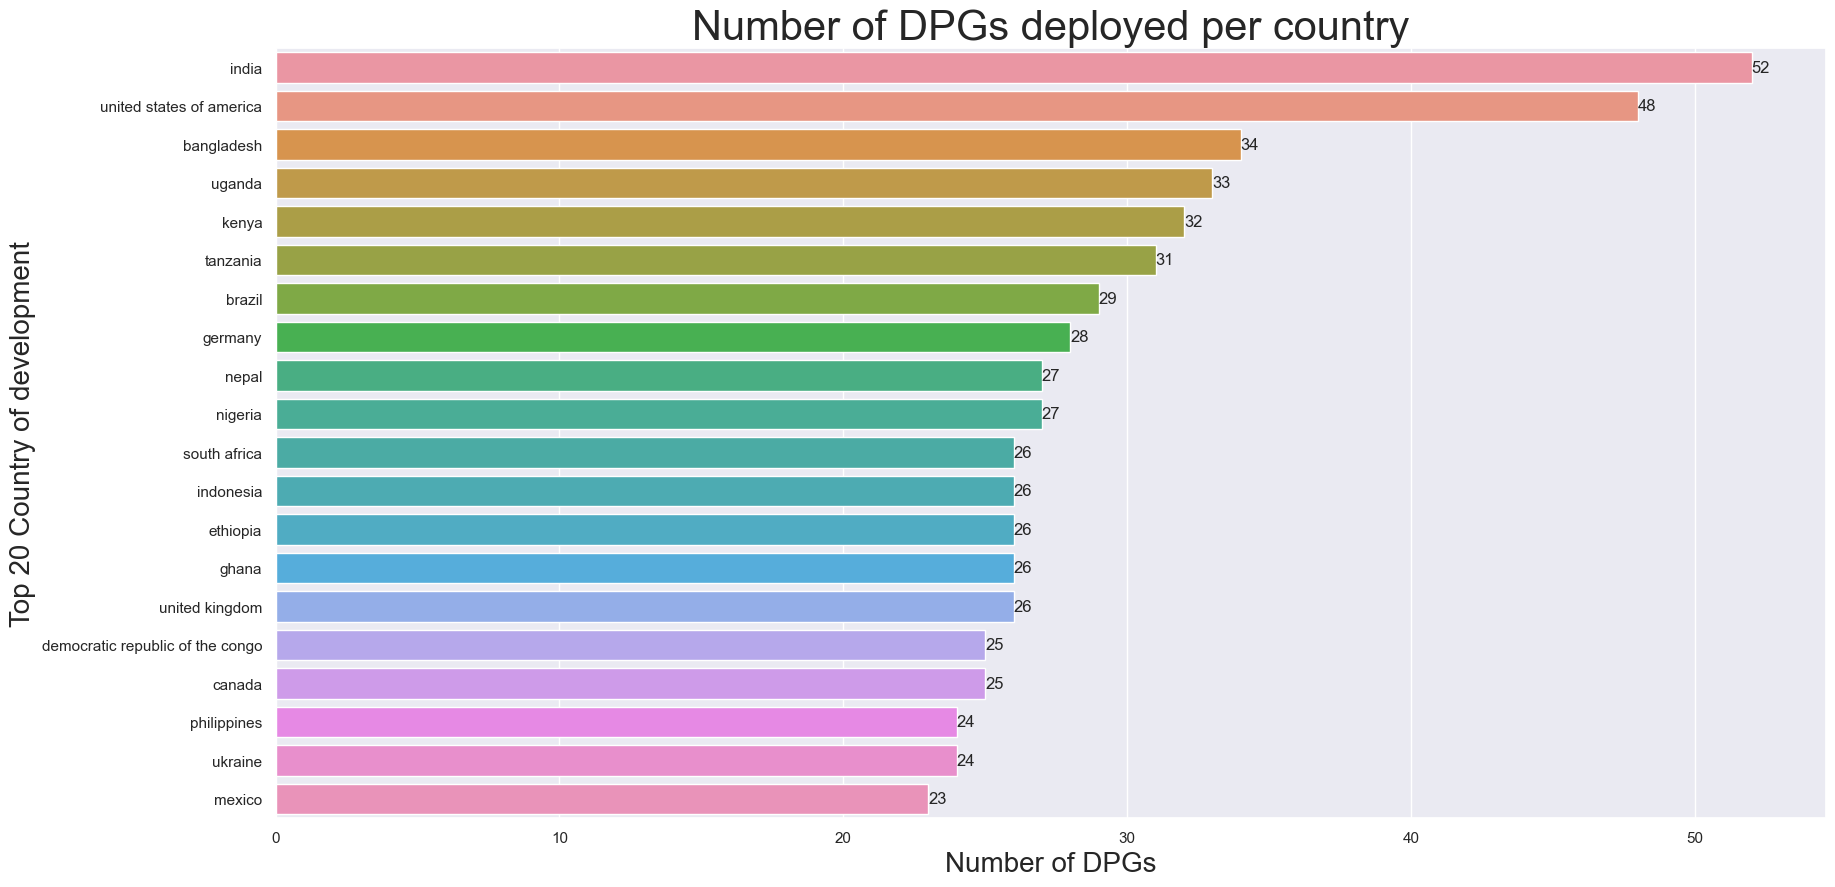

In [19]:
# Let's draw something
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


#ignoring case
deployments_per_country = df_deployment_countries.groupby(
      df_deployment_countries['deploymentCountries'].str.lower()
    ).size().sort_values(ascending=False).reset_index(name="numberOfDPGs")[:20] 

#Display deployment countries and numberOfDPGs
sns.set(rc={"figure.figsize":(20, 10)}) #Set size of the image
# Tell what are the axis
ax = sns.barplot(y="deploymentCountries", x="numberOfDPGs", data=deployments_per_country )
_ = ax.bar_label(ax.containers[0])

# Set the titles of the graph and the axis
plt.title("Number of DPGs deployed per country", size=30)
plt.xlabel("Number of DPGs", size=20)
plt.ylabel("Top 20 Country of development", size=20)
